In [4]:
import pickle
import torch
import numpy as np

malesNback = []
malesEmoid = []
femalesNback = []
femalesEmoid = []

for i in range(5):
    for gender in ['Male', 'Female']:
        with open(f'../../Work/MGIN/Masks/{gender}AgeGroup{i}.pkl', 'rb') as f:
            mask = pickle.load(f)
            nback = processMask(mask, 0, 0.95)
            emoid = processMask(mask, 1, 0.95)
            if gender == 'Male':
                malesNback.append(nback)
                malesEmoid.append(emoid)
            else:
                femalesNback.append(nback)
                femalesEmoid.append(emoid)
                
print('Complete')

Complete


In [2]:
import numpy as np

roiMap1 = np.zeros(265,dtype='int')
roiMap2 = np.zeros(265,dtype='int')
revMap2 = np.zeros(264,dtype='int')
roiNames = {}
borders1 = []
borders2 = []

with open('../../PNC/PP264_template.csv', 'r') as f:
    lines = f.readlines()
    for i in range(2,len(lines)):
        line = lines[i].split(',')
        area = int(line[11])
        r1 = int(line[0])
        r2 = int(line[1])
        name = line[14].strip()
        roiMap1[r1] = area
        roiMap2[r2] = area
        roiNames[area] = name
        revMap2[r1-1] = r2-1
#         print([area, r1, r2, name])

last1 = roiMap1[1]
last2 = roiMap2[1]
for i in range(2,265):
    if roiMap1[i] != last1:
        borders1.append(i)
        last1 = roiMap1[i]
    if roiMap2[i] != last2:
        borders2.append(i)
        last2 = roiMap2[i]
    
borders1 = [0] + borders1 + [264]
print(borders1)
print(borders2)

[0, 31, 36, 50, 63, 121, 126, 157, 182, 200, 213, 222, 233, 237, 264]
[13, 42, 47, 61, 74, 84, 86, 132, 133, 137, 138, 139, 140, 143, 174, 182, 186, 203, 221, 222, 235, 243, 247, 251, 253, 255, 256]


In [3]:
def topK(msk, q):
    mskq = np.quantile(msk, q)
    msk[msk < mskq] = 0
    msk[msk >= mskq] = 1
    assert np.sum(msk) == round((1-q)*msk.size), 'Error in topK'
    return msk

def maskDiag(A):
    if A.ndim != 2 or A.shape[0] != A.shape[1]:
        raise Exception('bad A shape')
    return A*(1-np.eye(A.shape[0]))

def rearrange(p,idcs):
    return p[:,idcs][idcs]

def processMask(rawMask, idx, q):
    msk = rawMask[idx*264*264:(idx+1)*264*264]
    msk = torch.sigmoid(msk).detach().cpu().numpy()
    msk = maskDiag(msk.reshape(264,264))
    msk = topK(msk, q)
    msk = rearrange(msk,revMap2)
    return msk

print('Complete')

Complete


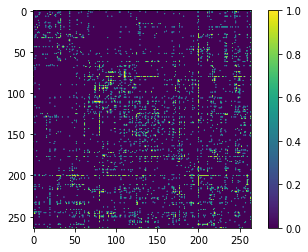

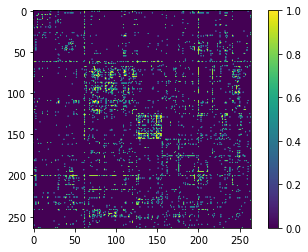

In [5]:
import matplotlib.pyplot as plt

plt.imshow(femalesNback[0])
plt.colorbar()
plt.show()

plt.imshow(femalesEmoid[0])
plt.colorbar()
plt.show()

In [17]:
commonNbackMales = np.ones([264,264])
commonEmoidMales = np.ones([264,264])
commonNbackFemales = np.ones([264,264])
commonEmoidFemales = np.ones([264,264])

for i in range(5):
    commonEmoidMales *= malesEmoid[i]
    print(np.sum(malesEmoid[i]))

3485.0
3485.0
3485.0
3485.0
3485.0


9.0


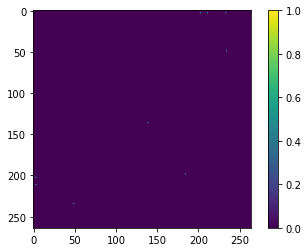

In [18]:
print(np.sum(commonEmoidMales))
plt.imshow(commonEmoidMales)
plt.colorbar()
plt.show()

In [19]:
np.nonzero(commonEmoidMales)

(array([  3,   3,   3,  49, 136, 198, 202, 211, 234]),
 array([202, 211, 233, 234, 139, 184,   3,   3,  49]))